In [1]:
#Our first machine learning model
#Garreta and Moncecchi pp 10-20
#uses Iris database and SGD classifier
import sklearn
print( 'The scikit learn version is {}.'.format(sklearn.__version__))

The scikit learn version is 0.21.2.


In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target
print( X_iris.shape, y_iris.shape)

(150, 4) (150,)


In [3]:
print( X_iris[0], y_iris[0])


[5.1 3.5 1.4 0.2] 0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Get dataset with only the first two attributes
X, y = X_iris[:, :2], y_iris
# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=33)
print( X_train.shape, y_train.shape)

(112, 2) (112,)


Text(0, 0.5, 'Sepal width')

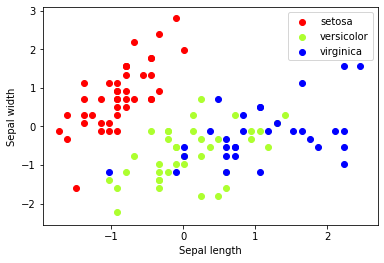

In [9]:
# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
import matplotlib.pyplot as plt
colors = ['red', 'greenyellow', 'blue']
#it doesnt like "xrange" changed to "range"
for i in range(len(colors)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [11]:
#found a typo here... incorrect from book followed by corrected code
#from sklearn.linear_modelsklearn._model import SGDClassifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)
print( clf.coef_)

[[-26.66251497  12.46257528]
 [ -2.09189299  -8.08032346]
 [ 10.80515467   2.13467041]]


In [12]:
print( clf.intercept_)


[-18.27172878  -0.53961092  -2.62678159]


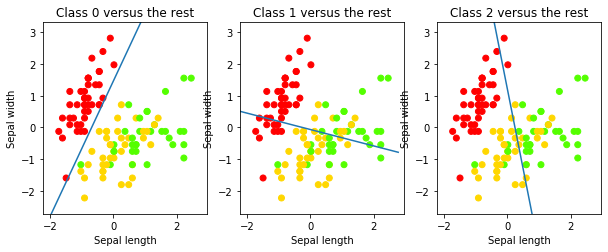

In [25]:
#don't forget to import Numpy as np here
import numpy as np
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
#error in case Xs or xs
Xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    #error here need plt.
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - Xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(Xs, ys, True)
    

In [26]:
print( clf.predict(scaler.transform([[4.7, 3.1]])) )

[2]


In [27]:
    print( clf.decision_function(scaler.transform([[4.7, 3.1]])) )


[[-104.95156576  -35.42051069   54.77492362]]


In [28]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print( metrics.accuracy_score(y_train, y_train_pred) )

0.8303571428571429


In [29]:
y_pred = clf.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred) )

0.6578947368421053


In [30]:
print( metrics.classification_report(y_test, y_pred, target_names=iris.target_names) )


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.42      0.45      0.43        11
   virginica       0.67      0.63      0.65        19

    accuracy                           0.66        38
   macro avg       0.69      0.70      0.69        38
weighted avg       0.66      0.66      0.66        38



In [31]:
print( metrics.confusion_matrix(y_test, y_pred) )


[[ 8  0  0]
 [ 0  5  6]
 [ 0  7 12]]
